In [1]:
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
from analysisImports import *
setLibParams()

cfgDir = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/configs/"
plt.style.use(cfgDir+'plt_settings.mplstyle')

In [2]:
importlib.reload(aTools)
az = aTools.Analyzer(cfgDir+'sample_configs/signal_aEM.json',cfgDir+'histo_configs/histoList.json',cfgDir+'histo_configs/histoPlotConfig.json')
fileset = az.sample_locs
samples = az.sample_names
sample_info = az.sample_info
histos = az.histos

In [3]:
proc = aTools.iDMeProcessor(samples,sample_info,fileset,histos)
out = processor.run_uproot_job(fileset,
                              treename='ntuples/outT',
                              processor_instance=proc,
                              executor=processor.iterative_executor,
                              executor_args={
                                  "schema":NanoAODSchema
                              })

Preprocessing:   0%|          | 0/44 [00:00<?, ?file/s]

Processing:   0%|          | 0/44 [00:00<?, ?chunk/s]

/uscms_data/d3/sbrightt/miniconda3/envs/coffea/lib/python3.8/site-packages/coffea/hist/plot.py:333: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


<AxesSubplot:xlabel='$p_{T}$ [GeV]', ylabel='Events'>

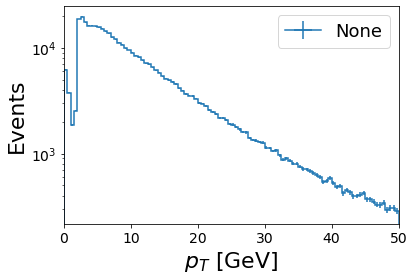

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/uscms_data/d3/sbrightt/miniconda3/envs/coffea/lib/python3.8/site-packages/XRootD/client/finalize.py", line 45, in finalize
    if isinstance(obj, File) and obj.is_open():
ReferenceError: weakly-referenced object no longer exists


In [4]:
h = out['ele_kinematics']
hd = h.integrate('sample',int_range='sig_2018_Mchi-48.0_dMchi-16.0_ctau-1').integrate('ele_type',int_range='Default')
hd2 = h.integrate('sample',int_range='sig_2018_Mchi-48.0_dMchi-16.0_ctau-1').integrate('ele_type',int_range='Default')
hd = hd.integrate('eta',overflow='all').integrate('phi',overflow='all')
plt.yscale('log')
hist.plot1d(hd)